In [1]:
import numpy as np

import sys
sys.path.insert(0, '../src')
from utils import *

AWS_FOLDER_COMPUTE = "./saved_results/aws_computed/"

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import all the variables from the dump files

fred30_60_max_len_list = load_variables("fred_max_len_list.dump", AWS_FOLDER_COMPUTE)
int_max_len_list = load_variables("int_max_len_list.dump", AWS_FOLDER_COMPUTE)


fred30_60_time_list = load_variables("fred_time_list.dump", AWS_FOLDER_COMPUTE)
int_time_list = load_variables("int_time_list.dump", AWS_FOLDER_COMPUTE)

fred30_60_smN = load_variables("fred_smN.dump", AWS_FOLDER_COMPUTE)
int_smN = load_variables("int_smN.dump", AWS_FOLDER_COMPUTE)

# Notice: the following variables have a different structure w.r.t. the previous ones.
# Below we compare smN and ahp30_smN
ahp30_max_len_list = load_variables("ahp_max_len_list.dump", AWS_FOLDER_COMPUTE)
ahp30_mat_time_list = load_variables("ahp_mat_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_time_list = load_variables("ahp_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_smN = load_variables("ahp_smN.dump", AWS_FOLDER_COMPUTE)

In [3]:
print(len(int_smN))
print(len(fred30_60_smN))
print(len(ahp30_smN))

27
18
6


## Add trailing values to Fred and AHP data
In the Frederickson data, we don't have all the cases with N=120. We have 9 missing values.

For AHP, only values for N=30 and m=5,10 are available, but the data structure should have the same length as for Fred and Int.
There are 21 missing values.

In [20]:
fred_max_len_list = fred30_60_max_len_list + [0]*9
fred_time_list = fred30_60_time_list + [np.nan]*9
fred_smN = fred30_60_smN + [()]*9

ahp_max_len_list = ahp30_max_len_list + [0]*21
ahp_mat_time_list = ahp30_mat_time_list + [0]*21
ahp_time_list = ahp30_time_list + [np.nan]*21
ahp_smN = ahp30_smN + [()]*21

smN = int_smN

In [5]:
print(len(int_smN))
print(len(fred_smN))
print(len(ahp_smN))

27
27
27


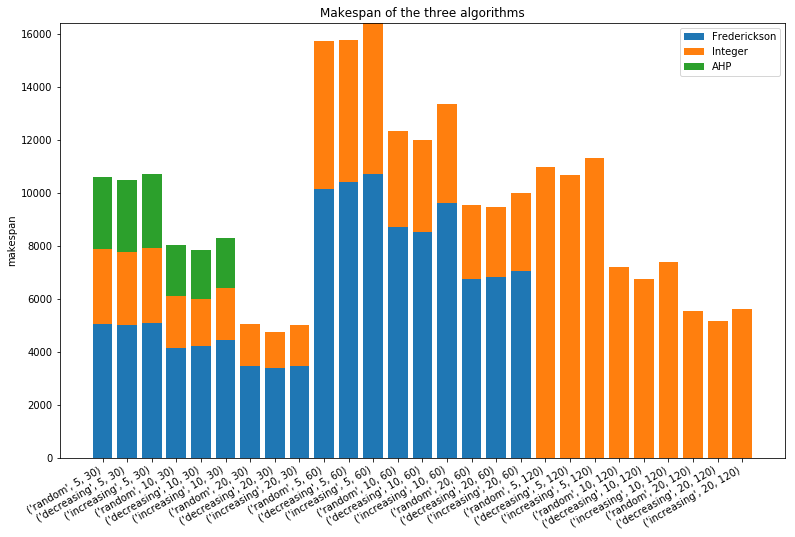

In [17]:
# Show the data on a stacked bar plot
xs = np.arange(0, len(smN))

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)

top = np.zeros(len(xs))
fred_bars = plt.bar(xs, fred_max_len_list)
top = top + fred_max_len_list
int_bars= plt.bar(xs, int_max_len_list, bottom=top)
top = top + int_max_len_list
ahp_bars = plt.bar(xs, ahp_max_len_list, bottom=top)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms")
plt.xticks(xs, smN)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.patch.set_facecolor('white')

plt.show()

In [15]:
def compute_labels(smn):
    labels = []
    for s,m,n in smn:
        labels.append("{} rob, {} mod".format(m,n))
    
    return labels

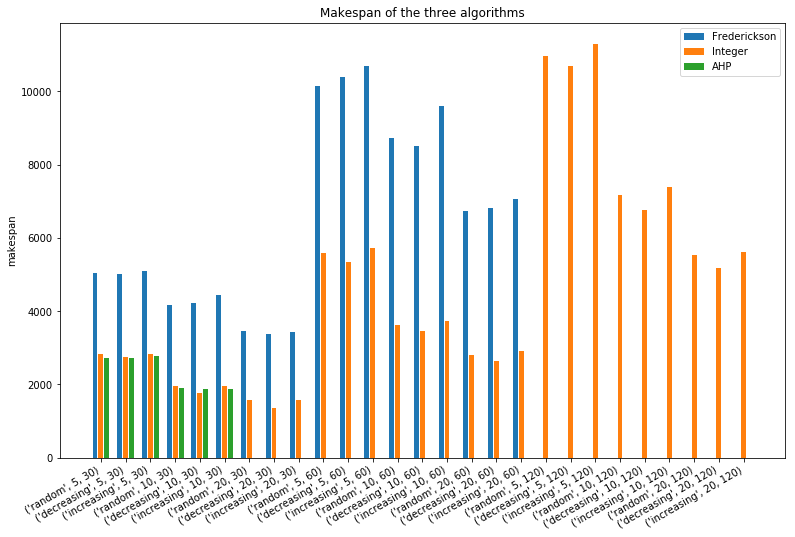

In [16]:
# Grouped bar plot

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(smN)) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, fred_max_len_list, width)
int_bars= plt.bar(int_xs, int_max_len_list, width)
ahp_bars = plt.bar(ahp_xs, ahp_max_len_list, width)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms")
plt.xticks(xs, compute_labels(smN))
plt.xticks(xs, smN)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.set_size_inches(13, 8)
fig.patch.set_facecolor('white')

fig, ax = plt.subplots() # needed to rotate the labelsplt.show()

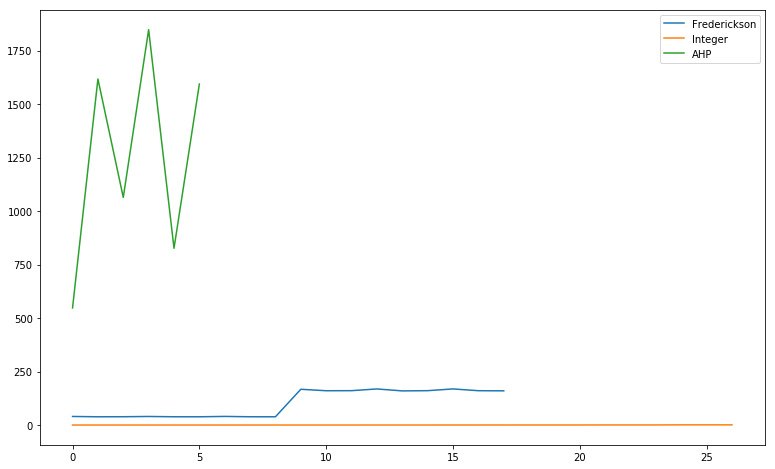

In [29]:
fig, ax = plt.subplots() # needed to rotate the labels

fred_line = ax.plot(xs, fred_time_list)
int_line = ax.plot(xs, int_time_list)
ahp_line = ax.plot(xs, ahp_time_list)
fig.set_size_inches(13, 8)
plt.legend(("Frederickson", "Integer", "AHP"))